In [19]:
import os
os.chdir('C:\\Users\\User\\Documents\\stat2020\\ass3')
os.getcwd()

'C:\\Users\\User\\Documents\\stat2020\\ass3'

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

In [21]:
orig_df = pd.read_excel('Assignment3_cluster2.xlsx',sheet_name='2562')
orig_df.head()

,ministry,personnel,operation,invest,subsidy,others
0,a,11490.0,79742.2,90596.1,279307.0,10396.7
1,b,3954.7,2962.6,6772.5,11813.6,15327.0
2,c,93590.8,24735.3,11188.3,5377.5,92234.7
3,d,12679.7,6433.3,3326.1,753.0,219755.9
4,e,2951.1,2577.8,419.5,1409.3,1839.6


<AxesSubplot:>

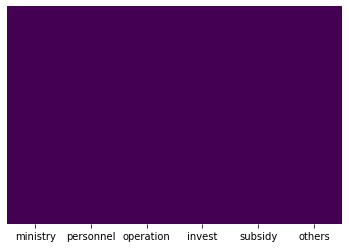

In [22]:
sns.heatmap(orig_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [23]:
orig_df.describe()

,personnel,operation,invest,subsidy,others
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,28476.122727,10628.604545,21429.568182,38455.772727,18034.850000
std,55369.852024,17485.290338,39892.448658,86733.701724,49252.012159
min,415.000000,324.500000,419.500000,34.300000,176.300000
25%,2153.575000,1224.675000,814.700000,801.825000,744.525000
50%,6713.450000,2980.550000,3224.550000,2376.250000,1746.350000
75%,17254.400000,14464.650000,20300.475000,10717.125000,8508.225000
max,237718.100000,79742.200000,166867.500000,279307.000000,219755.900000


In [24]:
orig_df.columns

Index(['ministry', 'personnel', 'operation', 'invest', 'subsidy', 'others'], dtype='object')

In [25]:
df = orig_df[['personnel','operation','invest', 'subsidy','others']]
df

,personnel,operation,invest,subsidy,others
0,11490.0,79742.2,90596.1,279307.0,10396.7
1,3954.7,2962.6,6772.5,11813.6,15327.0
2,93590.8,24735.3,11188.3,5377.5,92234.7
3,12679.7,6433.3,3326.1,753.0,219755.9
4,2951.1,2577.8,419.5,1409.3,1839.6
5,1509.6,1111.2,1441.6,369.5,1643.1
6,2741.8,2998.5,915.5,6510.5,176.3
7,24739.8,14596.1,65676.5,2979.3,1005.2
8,9472.2,2468.7,166867.5,45.9,744.3
9,1233.6,896.1,1243.2,1773.2,267.3


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,0.046670,1.000000,0.541770,1.000000,0.046545
1,0.014916,0.033218,0.038168,0.042178,0.068999
2,0.392645,0.307372,0.064698,0.019133,0.419248
3,0.051684,0.076920,0.017463,0.002573,1.000000
4,0.010687,0.028373,0.000000,0.004924,0.007575


In [27]:
df_normalized.describe()

,0,1,2,3,4
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.118250,0.129746,0.126226,0.137577,0.081331
std,0.233330,0.220169,0.239669,0.310570,0.224301
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007326,0.011335,0.002374,0.002748,0.002588
50%,0.026542,0.033444,0.016852,0.008386,0.007150
75%,0.070962,0.178048,0.119443,0.038252,0.037945
max,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'SSE')

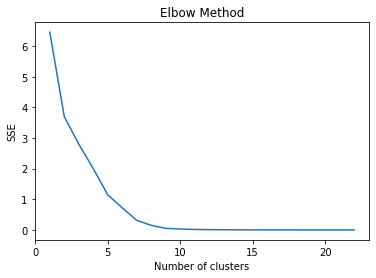

In [28]:
max_k = 23
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [29]:
k = 6

In [30]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=6)

In [31]:
cluster_predictions = kmeans.predict(df_normalized)
df['cluster_id'] = cluster_predictions
df

,personnel,operation,invest,subsidy,others,cluster_id
0,11490.0,79742.2,90596.1,279307.0,10396.7,2
1,3954.7,2962.6,6772.5,11813.6,15327.0,1
2,93590.8,24735.3,11188.3,5377.5,92234.7,0
3,12679.7,6433.3,3326.1,753.0,219755.9,4
4,2951.1,2577.8,419.5,1409.3,1839.6,1
5,1509.6,1111.2,1441.6,369.5,1643.1,1
6,2741.8,2998.5,915.5,6510.5,176.3,1
7,24739.8,14596.1,65676.5,2979.3,1005.2,0
8,9472.2,2468.7,166867.5,45.9,744.3,3
9,1233.6,896.1,1243.2,1773.2,267.3,1


In [32]:
df.to_csv('res_2562.csv')

In [33]:
df.cluster_id.value_counts()

1    13
0     4
2     2
5     1
4     1
3     1
Name: cluster_id, dtype: int64

In [34]:
print(metrics.silhouette_score(df,kmeans.labels_))

0.5783859325887067


In [35]:
print(metrics.davies_bouldin_score(df,kmeans.labels_))

0.43054934619867496


In [36]:
df[df.cluster_id==0].mean()

personnel     73142.550
operation     17903.775
invest        28965.525
subsidy        5609.550
others        24495.525
cluster_id        0.000
dtype: float64